# Hardy-Littlewood Maximal Function
Author: William Guss

The following is a notebook for producing visualizations of the Hardy-Littlewood Maximal Function
of a variety of different numerically integrable functions.
$$Hf(x) = \sup_{r>0} \frac{1}{\mu(B_r(x))}\int_{B_r(x)} |f(y)|\ d\mu(y)$$

In [123]:
# Import various plotitng utilities.
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [124]:
# The code for computing HL Maximal functions and plotting it.
FID=300 # This is how many samples to take.
def little_wood(f, x, r, interval):
    """
    This function performs average numerical integration on $f$
    over ball of radius $r$ arround $x$. The interval
    argument is the interval [a,b] on which $f$ is defined. 
    """
    lx = x -r
    rx = x +r
    length = rx - lx
    dx = length/FID
    a,b = interval
    
    # Perform numerical integration
    integral = 0
    for i in range(FID):
        if lx +i*dx > a and lx + i*dx < b:
            integral += abs(f(lx + i*dx))*dx
    # Divide by the measure of the ball.
    return integral/(2*r)

def hl_maximal(f, x, interval):
    """
    This function takes the maximum average value on
    f on any ball of radius $r$ where $f$ is defined
    on the interval $[a,b]$.
    """
    a,b = interval
    r_max = b-a
    
    dr = r_max/FID
    lw = []
    for i in range(FID):
        lw += [little_wood(f,x, (i+1)*dr, interval)]
    return max(lw)

def plot_hlmaximal(f, interval, name=None):
    """
    This function plots the the Hardy-Littlewood Maximal
    function on an interval [a,b] given some
    lambda f. The name argument is used
    for producing a nice legend."""
    X = np.linspace(interval[0], interval[1], num=FID)
    X_prime = X[1:-1]
    f_plot = np.array([f(x) for x in X_prime])
    hf_plot = np.array([hl_maximal(f, x, interval) for x in X_prime])
    
    if name:
        plt.title("Plot of $Hf$ against $f$.".format(name))  
        plt.plot(X_prime, f_plot, label="$f(x) = {}$".format(name))
        plt.plot(X_prime, hf_plot, label="$Hf(x)$")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        plt.plot(X_prime, f_plot)
        plt.plot(X_prime, hf_plot)
    plt.show()

## Examples
The following are some interesting examples produced using the algorithm. First we assume that all $f \in L^1(\mu)$ and that outside of some interval $[a,b]$, $f(x) = 0$. 

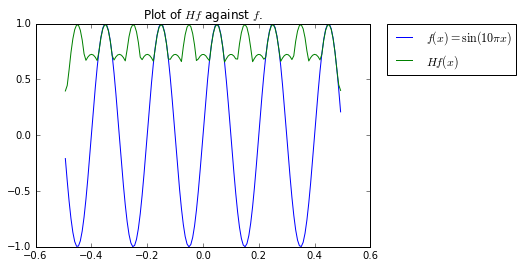

In [125]:
interval = -0.5, 0.5
f = lambda x: np.sin(x*np.pi*10)
plot_hlmaximal(f, interval, name="\sin(10\pi x)")

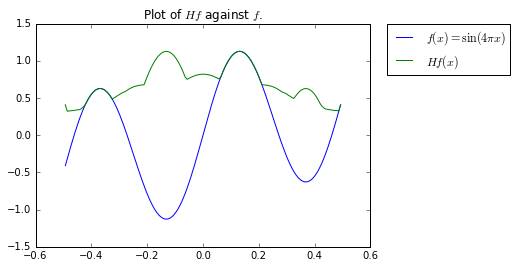

In [126]:
interval = -0.5, 0.5
f = lambda x: np.sin(x*np.pi*4) + x
plot_hlmaximal(f, interval, name="\sin(4\pi x)")

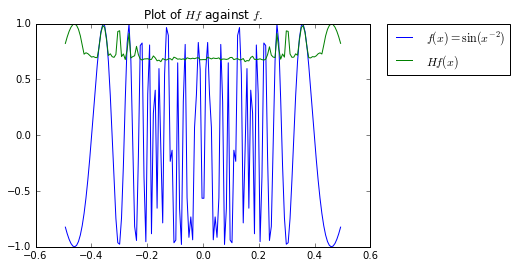

In [133]:
interval = -0.5, 0.5
f = lambda x: np.sin(x**(-2))
plot_hlmaximal(f, interval, name="\sin(x^{-2})")

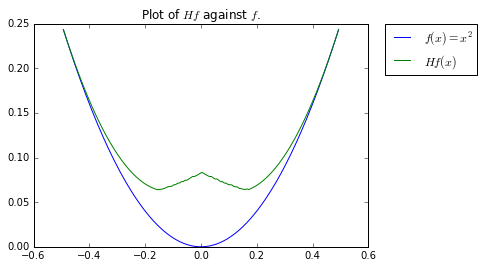

In [128]:
interval = -0.5, 0.5
f = lambda x: x**2
plot_hlmaximal(f, interval, name="x^2")

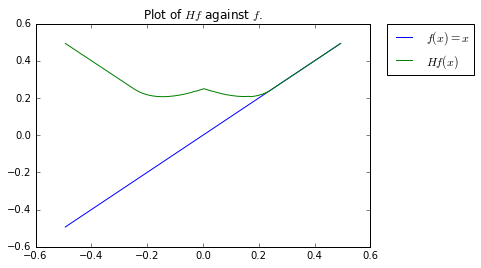

In [129]:
interval = -0.5, 0.5
f = lambda x: x
plot_hlmaximal(f, interval, name="x")

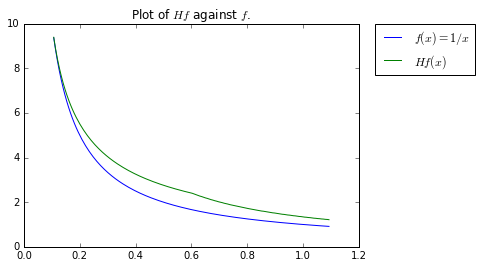

In [130]:
interval = 0.1, 1.1
f = lambda x: 1/x
plot_hlmaximal(f, interval, name="1/x")

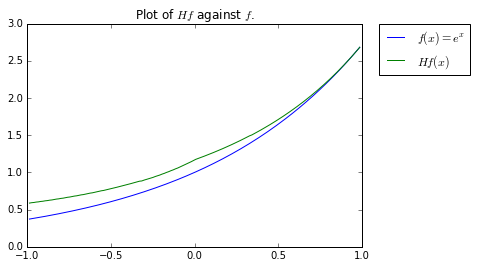

In [131]:
interval = -1, 1
f = lambda x: np.exp(x)
plot_hlmaximal(f, interval, name="e^x")

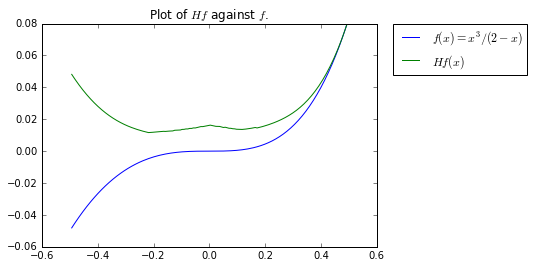

In [132]:
interval = -0.5,0.5
f = lambda x: x**3/(2-x)
plot_hlmaximal(f, interval, name="x^3/(2-x)")